In [1]:
#Import of function to calculate comoving distances 
import sys 
sys.path.append("../")
from pyACC.Cosmology import Integrand_comoving_distance
from pyACC.Cosmology import comoving_distance

import numpy as np
import math 
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",})

#Import from scipy to interpolate
from scipy import interpolate

# Import pyACC logger
from pyACC.helpers import Logger

# Set the logger
print = Logger("pyACC.CosmologicalDistances")#Import of function to calculate comoving distances 
import sys 
sys.path.append("../")
from pyACC.Cosmology import Integrand_comoving_distance
from pyACC.Cosmology import comoving_distance

import numpy as np
import math 
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",})

#Import for symbolic use of python
import sympy as sp

# Import pyACC logger
from pyACC.helpers import Logger

# Set the logger
print = Logger("pyACC.CosmologicalDistances")

In [2]:
#Definition of parameters and Cosmologiacal Model 
z_min     = 0 
z_max     = 2
delta_z   = 0.1
Omega_mat = 0.319 
H_0       = 67

def Hubble_function_L_CDM(z, Omega_mat, H_0):
    return H_0*(Omega_mat*(1+z)**3+1-Omega_mat)**0.5

In [3]:
#Set of redshifts
z_list = np.arange(z_min, z_max, delta_z)

#Computing comoving distances
d_list = []

for i in range(len(z_list)):
    comoving_distances_L_CDM = comoving_distance(z_list[i], Hubble_function_L_CDM, Omega_mat, H_0)
    d_list.append(comoving_distances_L_CDM)

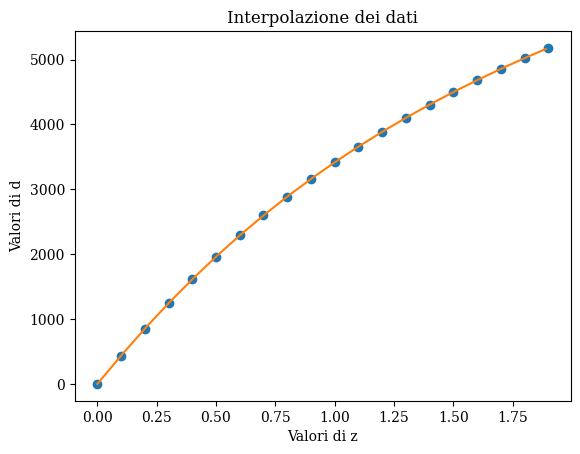

2024-03-20 09:02:34.275841 :: pyACC.CosmologicalDistances  :: 190
2024-03-20 09:02:34.275993 :: pyACC.CosmologicalDistances  :: 20


In [4]:
#Function resulting from interpolate
f = interpolate.interp1d(z_list, d_list, kind='linear', bounds_error='false', fill_value=np.nan) 
#interp1d takes x and y, interpoles with kind; fill_value allows you to define value out of range: in this case, nan

#Wanting to have access to all points f has calculated
delta_z_new = 0.01

z_list_new = np.arange(z_min, z_max-0.1, delta_z_new)

d_list_new = f(z_list_new)   # use interpolation function returned by `interp1d`

plt.plot(z_list, d_list, 'o', z_list_new, d_list_new, '-')
plt.xlabel('Valori di z')
plt.ylabel('Valori di d')
plt.title('Interpolazione dei dati')
plt.show()

print(len(z_list_new))
print(len(z_list))

2024-03-20 09:02:39.056517 :: pyACC.CosmologicalDistances  :: 190
2024-03-20 09:02:39.056786 :: pyACC.CosmologicalDistances  :: 190
2024-03-20 09:02:39.057177 :: pyACC.CosmologicalDistances  :: 190
2024-03-20 09:02:39.057286 :: pyACC.CosmologicalDistances  :: [-0.0, 0.9812914093841911, 1.7471592909979705, 2.2964960096259404, 2.6282614374762545, 2.7414825522430704, 2.6352529649157646, 2.3087323803373465, 1.7611459936269966, 0.9917838255451557, -0.0, 1.010110773307133, 1.796697286182507, 2.3593011060842173, 2.6975244986615508, 2.8110294636910567, 2.6995367322012953, 2.3628247278074923, 1.8007284954344414, 1.0131386002727822, -0.0, 1.0125252431101899, 1.7995502460569242, 2.3611761521016206, 2.6975537743036284, 2.80888237532281, 2.69540843644927, 2.357424418219807, 1.7952675148917479, 1.009318405008571, -0.0, 0.9935513342511513, 1.76470089199006, 2.313990785653914, 2.6420003745672602, 2.749345032048268, 2.6366749209360023, 2.304673779237419, 1.7540577169238531, 0.9855740253001386, -0.0, 0.

Text(0.5, 1.0, 'Redshift vs Errore')

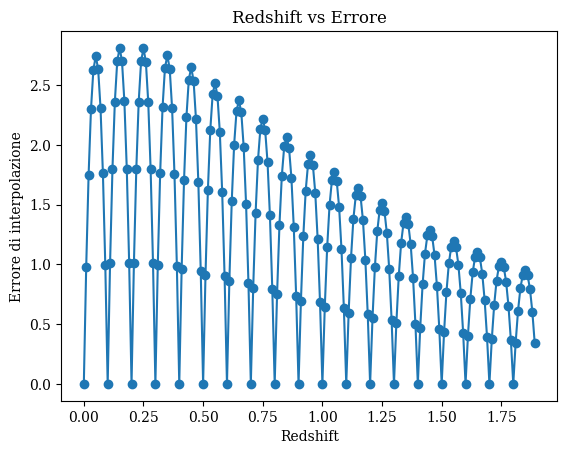

In [5]:
#Computing error between theory and computation

#Theory
d_theory = []

for i in range(len(z_list_new)):
    comoving_distances_L_CDM_2 = comoving_distance(z_list_new[i], Hubble_function_L_CDM, Omega_mat, H_0)
    d_theory.append(comoving_distances_L_CDM_2)

print(len(d_theory))
print(len(d_list_new))

Delta = []

for i in range(len(z_list_new)):
    delta = d_list_new[i] - d_theory[i]
    Delta.append(-delta)

print(len(Delta))
print(Delta)


plt.plot(z_list_new, Delta,  marker='o', linestyle='-')  # marker='o' indica che vogliamo visualizzare i punti e linestyle='-' indica che vogliamo una linea continua
plt.xlabel('Redshift')
plt.ylabel('Errore di interpolazione')
plt.title('Redshift vs Errore')

**Theoretical Extimation of Error**

As we know form theory, for a linear interpolation method, the error is estimable with the following disequazion, taking $x$ as variable:
$$
|\epsilon_{max}| \leq \frac{\Delta x}{8}max_{in \Delta x}|f''(x)|
$$

In [6]:
#Comparing with theoretical error using SymPy

#Defining symbol to use
par = sp.symbols('x x1 H0 Omega_mat', real = True, positive = True)   #or sp.Symbol('x'); note: it is useful to specify all available info about variable (in this case that it is real and positive)
print(par[0]**2)
#Defining function f to manipulate (it has to be the comoving distance)

#Defining one over Hublle rate as a symbolic function
H = par[2]*(par[3]*(1+par[1])**3+1-par[3])**0.5

print(H)

#Defining comoving distance
c = 3*10**5 #remainder: km/s
comoving_fun = c*sp.Integral(1 / H, (par[1],0,par[0]))
print(comoving_fun)
#carciofo = x**3
#print(carciofo)

#Doing the second derivative
f_double_prime = sp.diff(comoving_fun, par[0], 2) #Last argument is how many time you differentiate
print(f_double_prime)

#Computing error
#e = f_double_prime
delta_z = sp.Symbol('delta_z')
e = delta_z**2*sp.Abs(f_double_prime)/8

# Creation of list of values for x in order to plot e
x_values = np.linspace(0, 2, 200)

# Computing values for e
#alternative: e_values =[e.subs(x, val).evalf() for val in x_values]

e_func = sp.lambdify([par[0], delta_z],e.subs(par[2], 67).subs(par[3],0.319)) #lambdify makes SimPy expression something Python can use (a numerical function)




2024-03-20 09:02:39.560329 :: pyACC.CosmologicalDistances  :: x**2
2024-03-20 09:02:39.690994 :: pyACC.CosmologicalDistances  :: H0*(Omega_mat*(x1 + 1)**3 - Omega_mat + 1)**0.5
2024-03-20 09:02:39.712539 :: pyACC.CosmologicalDistances  :: 300000*Integral(1/(H0*(Omega_mat*(x1 + 1)**3 - Omega_mat + 1)**0.5), (x1, 0, x))
2024-03-20 09:02:39.756203 :: pyACC.CosmologicalDistances  :: -450000.0*Omega_mat*(x + 1)**2/(H0*(Omega_mat*(x + 1)**3 - Omega_mat + 1)**1.5)


In [7]:
e_func(0.1, 0.1)

2.7876177028974354

In [8]:
comoving_fun

300000*Integral(1/(H0*(Omega_mat*(x1 + 1)**3 - Omega_mat + 1)**0.5), (x1, 0, x))

In [9]:
H


H0*(Omega_mat*(x1 + 1)**3 - Omega_mat + 1)**0.5

In [10]:
1/H

1/(H0*(Omega_mat*(x1 + 1)**3 - Omega_mat + 1)**0.5)

In [11]:
f_double_prime

-450000.0*Omega_mat*(x + 1)**2/(H0*(Omega_mat*(x + 1)**3 - Omega_mat + 1)**1.5)

In [12]:
comoving_fun

300000*Integral(1/(H0*(Omega_mat*(x1 + 1)**3 - Omega_mat + 1)**0.5), (x1, 0, x))

Text(0.5, 1.0, 'Redshift vs Errore')

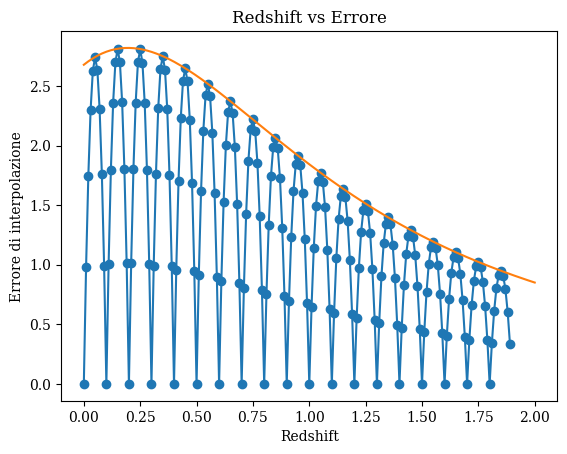

In [13]:
#Plotting previous graph with e
plt.plot(z_list_new, Delta, marker='o', linestyle='-')  
plt.plot(x_values,e_func(x_values, 0.1), label="e")#alternative: plt.plot(x_values,e_values, label="e")
plt.xlabel('Redshift')
plt.ylabel('Errore di interpolazione')
plt.title('Redshift vs Errore')
